# __Data Science Capstone Project__

## 1. Introduction


Most of the uses of Data Science has to be with business. Nowadays, most of companies are data-driven and They make decisions based on data which is analyzed by data analysts or data scientists. These decisions might be related to costs, expenses or investments. 

For this project let's think about an investment firm which is willing to start a new business in Canada. They want to launch a new bakery and coffe shop in some specific places in the Great Toronto Area. The idea is to identify those neighborhoods which do not have this kind of business in a radio of 30 kms (e.g Tim Hortons or Starbucks) and set the new business in those places. It is also important to identify the population in this neigborhoods so they can decide wheter it is worthed or not.


## 2. Data

The datasets that are going to be used for this project  are:
* Great Toronto Area regions and cities. The regions that comprise this area are: Toronto City, Durham, Halton, Peel and York.
* Great Toronto Area population by region.
* Foursquare location data to identify all the similar business within this area.

## 3. Methodology

In order to comply with the objective of this research, which is to identify those places within the Great Toronto Area (GTA) that are lack of any bakery and coffe shop, it is going to be used some datasets as it was metioned before that will help to see which those areas or places are. 

In this case, it will be used the cities which belong to the GTA and it is  found on Wikipedia in the link below:
https://en.wikipedia.org/wiki/Greater_Toronto_Area

Also, fot the GTA population, it will be used a dataset from Wikipedia. It is not updated to 2020 but it is selected for academic reasons:

https://en.wikipedia.org/wiki/List_of_municipalities_in_the_Greater_Toronto_Area

First, lets import all libraries needed to process and analyze the data

In [1]:
import numpy as np 
import pandas as pd

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

Now, for scraping the website where the data is, lets use Beautiful Soup, so lets import the libraries

In [2]:
%pip install lxml
%pip install bs4
import lxml.html as lh
import bs4 as bs
import urllib.request

     |████████████████████████████████| 5.5MB 7.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 122kB 14.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


We scrape on the site

In [3]:
gta=pd.read_html("https://en.wikipedia.org/wiki/Greater_Toronto_Area")

In [4]:
gta=gta[1]
gta

,Census division,Census subdivision,In GTA,Toronto CMA,Oshawa CMA
0,Toronto,Toronto,NaN,NaN,NaN
1,Durham Region,Ajax,NaN,NaN,NaN
2,Durham Region,Clarington,NaN,NaN,NaN
3,Durham Region,Brock,NaN,NaN,NaN
4,Durham Region,Oshawa,NaN,NaN,NaN
5,Durham Region,Pickering,NaN,NaN,NaN
6,Durham Region,Scugog,NaN,NaN,NaN
7,Durham Region,Uxbridge,NaN,NaN,NaN
8,Durham Region,Whitby,NaN,NaN,NaN
9,Halton Region,Burlington,NaN,NaN,NaN


Now, let's clean the dataset by dropping unnecessary columns and renaming properly the ones we are going to work with

In [5]:
gta.drop(['In GTA','Toronto CMA','Oshawa CMA'], axis=1, inplace=True)

In [6]:
gta.rename(columns={"Census division": "Region", "Census subdivision": "City"}, inplace=True)

Then, let's create two columns for the latitude and longitude parameters

In [7]:
gta['Latitude']="0"
gta['Longitude']="0"
gta

,Region,City,Latitude,Longitude
0,Toronto,Toronto,0,0
1,Durham Region,Ajax,0,0
2,Durham Region,Clarington,0,0
3,Durham Region,Brock,0,0
4,Durham Region,Oshawa,0,0
5,Durham Region,Pickering,0,0
6,Durham Region,Scugog,0,0
7,Durham Region,Uxbridge,0,0
8,Durham Region,Whitby,0,0
9,Halton Region,Burlington,0,0


Now, by using geocoder we get the latitude and longitude for each city in the GTA

In [8]:
i=0

for city in gta.City:
    address= city+","+"Ontario"+","+"Canada"
    
    geolocator = Nominatim(user_agent="on_explorer")
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        gta.Latitude[i]=latitude
        gta.Longitude[i]=longitude
        i=i+1
    except AttributeError:
        gta.Latitude[i]=0
        gta.Longitude[i]=0
        i=i+1
        pass

gta

,Region,City,Latitude,Longitude
0,Toronto,Toronto,43.6535,-79.3839
1,Durham Region,Ajax,43.8504,-79.0247
2,Durham Region,Clarington,43.9687,-78.6514
3,Durham Region,Brock,44.3477,-79.1002
4,Durham Region,Oshawa,43.9177,-78.863
5,Durham Region,Pickering,43.8358,-79.0906
6,Durham Region,Scugog,44.1151,-78.906
7,Durham Region,Uxbridge,44.1089,-79.1227
8,Durham Region,Whitby,43.8999,-78.9402
9,Halton Region,Burlington,43.3249,-79.7967


Let's plot a map showing every city in the GTA

In [40]:
# create map of ONTARIOusing latitude and longitude values
map_gta = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, region, city in zip(gta['Latitude'], gta['Longitude'], gta['Region'], gta['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gta)  
    
map_gta

Now let's download and  see the population dataset 

In [41]:
gta_ppl=pd.read_html('https://en.wikipedia.org/wiki/List_of_municipalities_in_the_Greater_Toronto_Area')
gta_ppl=gta_ppl[0]
gta_ppl

,Census subdivision,Population2006[2],Population2011[3],Populationdensity 2011a[3],Population2016[4],Populationdensity 2016a[4]
0,Ajax,90167,109600,1634.2,119677,1786.4
1,Aurora,47629,53203,1068.8,55445,1112.3
2,Brampton,433806,523906,1967.1,593638,2228.7
3,Brock,11979,11341,26.8,11642,27.5
4,Burlington,164415,175779,946.8,183314,987.3
5,Caledon,57050,59460,86.4,66502,96.6
6,Clarington,77820,84548,138.3,92013,150.5
7,East Gwillimbury,21069,22473,91.7,23991,97.9
8,Georgina,42346,43517,151.2,45418,157.8
9,Halton Hills,55289,59013,213.6,61161,221.4


Let's add the last population census to our gta dataset

In [42]:
gta['Population']=gta_ppl['Population2016[4]'].astype(int)
gta

,Region,City,Latitude,Longitude,Population
0,Toronto,Toronto,43.6535,-79.3839,119677.0
1,Durham Region,Ajax,43.8504,-79.0247,55445.0
2,Durham Region,Clarington,43.9687,-78.6514,593638.0
3,Durham Region,Brock,44.3477,-79.1002,11642.0
4,Durham Region,Oshawa,43.9177,-78.863,183314.0
5,Durham Region,Pickering,43.8358,-79.0906,66502.0
6,Durham Region,Scugog,44.1151,-78.906,92013.0
7,Durham Region,Uxbridge,44.1089,-79.1227,23991.0
8,Durham Region,Whitby,43.8999,-78.9402,45418.0
9,Halton Region,Burlington,43.3249,-79.7967,61161.0


As we can see, there are some cities without population info. As they are just a few, lets search the population and write it manually on the dataframe

In [43]:
gta['Population'][25]= 8609
gta['Population'][26]= 28900
gta['Population'][27]= 35325
gta['Population'][28]= 41439
gta

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,Region,City,Latitude,Longitude,Population
0,Toronto,Toronto,43.6535,-79.3839,119677.0
1,Durham Region,Ajax,43.8504,-79.0247,55445.0
2,Durham Region,Clarington,43.9687,-78.6514,593638.0
3,Durham Region,Brock,44.3477,-79.1002,11642.0
4,Durham Region,Oshawa,43.9177,-78.863,183314.0
5,Durham Region,Pickering,43.8358,-79.0906,66502.0
6,Durham Region,Scugog,44.1151,-78.906,92013.0
7,Durham Region,Uxbridge,44.1089,-79.1227,23991.0
8,Durham Region,Whitby,43.8999,-78.9402,45418.0
9,Halton Region,Burlington,43.3249,-79.7967,61161.0


Next, we are going to start utilizing the Foursquare API to explore the cities and segment them.

In [13]:
CLIENT_ID = 'GCYBG2U33RQJA4NB11B1Z5R3OTRMGT3ILACISLUD3GUGRRQK' 
CLIENT_SECRET = 'GA35TJH5DWELWEZX2Z4JITVTDIHGMCFSBT0QUWMGM3S0YTBJ' 
VERSION = '20180605' 

print('Your credentails:')

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GCYBG2U33RQJA4NB11B1Z5R3OTRMGT3ILACISLUD3GUGRRQK
CLIENT_SECRET:GA35TJH5DWELWEZX2Z4JITVTDIHGMCFSBT0QUWMGM3S0YTBJ


Get the neighborhood's latitude and longitude values.

In [14]:
# type your answer here


LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 300000 # define radius




In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:

gta_venues = getNearbyVenues(names=gta['City'],
                                   latitudes=gta['Latitude'],
                                   longitudes=gta['Longitude']
                                  )


Toronto
Ajax
Clarington
Brock
Oshawa
Pickering
Scugog
Uxbridge
Whitby
Burlington
Halton Hills
Milton
Oakville
Brampton
Caledon
Mississauga
Aurora
East Gwillimbury
Georgina
King
Markham
Newmarket
Richmond Hill
Vaughan
Whitchurch-Stouffville
Mono
Orangeville
Bradford West Gwillimbury
New Tecumseth


In [17]:
print(gta_venues.shape)
gta_venues.head()

(562, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Toronto,43.653482,-79.383935,Downtown Toronto,43.653232,-79.385296,Neighborhood
1,Toronto,43.653482,-79.383935,Nathan Phillips Square,43.652270,-79.383516,Plaza
2,Toronto,43.653482,-79.383935,Japango,43.655268,-79.385165,Sushi Restaurant
3,Toronto,43.653482,-79.383935,Eggspectation Bell Trinity Square,43.653144,-79.381980,Breakfast Spot
4,Toronto,43.653482,-79.383935,Poke Guys,43.654895,-79.385052,Poke Place


In [18]:
gta_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Ajax,6,6,6,6,6,6
Aurora,7,7,7,7,7,7
Bradford West Gwillimbury,9,9,9,9,9,9
Brampton,24,24,24,24,24,24
Burlington,56,56,56,56,56,56
Caledon,3,3,3,3,3,3
East Gwillimbury,2,2,2,2,2,2
Georgina,7,7,7,7,7,7
Halton Hills,1,1,1,1,1,1


In [19]:
print('There are {} uniques categories.'.format(len(gta_venues['Venue Category'].unique())))

There are 151 uniques categories.


In [20]:
# one hot encoding
gta_onehot = pd.get_dummies(gta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
gta_onehot['City'] = gta_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [gta_onehot.columns[-1]] + list(gta_onehot.columns[:-1])
gta_onehot = gta_onehot[fixed_columns]

gta_onehot.head()

,City,ATM,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,...,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
gta_grouped = gta_onehot.groupby('City').mean().reset_index()
gta_grouped

,City,ATM,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,...,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Ajax,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
1,Aurora,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
2,Bradford West Gwillimbury,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
3,Brampton,0.00000,0.000000,0.00,0.041667,0.000000,0.000000,0.041667,0.000000,0.083333,...,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.00,0.0000,0.000000,0.000000
4,Burlington,0.00000,0.017857,0.00,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,...,0.017857,0.000000,0.000000,0.035714,0.000000,0.017857,0.00,0.0000,0.000000,0.000000
5,Caledon,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
6,East Gwillimbury,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
7,Georgina,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
8,Halton Hills,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000
9,King,0.00000,0.040000,0.02,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000,...,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.0000,0.000000,0.010000


In [22]:
num_top_venues = 5

for hood in gta_grouped['City']:
    print("----"+hood+"----")
    temp = gta_grouped[gta_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ajax----
                       venue  freq
0                       Café  0.17
1              Grocery Store  0.17
2             Breakfast Spot  0.17
3         Mexican Restaurant  0.17
4  Middle Eastern Restaurant  0.17


----Aurora----
          venue  freq
0          Bank  0.29
1    Restaurant  0.14
2           Spa  0.14
3   Bus Station  0.14
4  Burger Joint  0.14


----Bradford West Gwillimbury----
                venue  freq
0         Coffee Shop  0.22
1         Gas Station  0.11
2  Italian Restaurant  0.11
3          Restaurant  0.11
4         Pizza Place  0.11


----Brampton----
                venue  freq
0                Bank  0.08
1  Italian Restaurant  0.08
2         Coffee Shop  0.08
3        Liquor Store  0.04
4         Bus Station  0.04


----Burlington----
         venue  freq
0  Coffee Shop  0.07
1          Pub  0.07
2         Bank  0.04
3         Café  0.04
4   Restaurant  0.04


----Caledon----
          venue  freq
0          Café  0.33
1  Soccer Field  0.33
2  Ska

Let's print columns names so we can identify the categories we are interested in

In [70]:
for col_name in gta_grouped.columns: 
    print(col_name)

City
ATM
American Restaurant
Art Gallery
Art Museum
Arts & Crafts Store
Asian Restaurant
BBQ Joint
Bakery
Bank
Bar
Baseball Field
Beer Bar
Beer Store
Big Box Store
Bookstore
Breakfast Spot
Brewery
Bubble Tea Shop
Burger Joint
Bus Station
Bus Stop
Business Service
Café
Campground
Candy Store
Chinese Restaurant
Church
Clothing Store
Cocktail Bar
Coffee Shop
College Gym
Colombian Restaurant
Comic Shop
Concert Hall
Convenience Store
Cosmetics Shop
Creperie
Deli / Bodega
Department Store
Dessert Shop
Dim Sum Restaurant
Diner
Discount Store
Distribution Center
Dumpling Restaurant
Electronics Store
Farmers Market
Fast Food Restaurant
Field
Food Court
Food Truck
Fountain
French Restaurant
Fried Chicken Joint
Frozen Yogurt Shop
Furniture / Home Store
Gas Station
Gastropub
General Travel
Gift Shop
Gluten-free Restaurant
Greek Restaurant
Grocery Store
Gym
Gym / Fitness Center
Harbor / Marina
Health & Beauty Service
Home Service
Hostel
Hotel
Hotpot Restaurant
Ice Cream Shop
Indian Restaurant
Irish

Then let's bring up the mean frequency for our categories in every city

In [23]:
gta_coffee=gta_grouped[["City","Bakery","Café","Coffee Shop"]]
gta_coffe=round(gta_coffee, 4)
gta_coffe.set_index('City')
gta_coffe


,City,Bakery,Café,Coffee Shop
0,Ajax,0.0000,0.1667,0.0000
1,Aurora,0.0000,0.0000,0.0000
2,Bradford West Gwillimbury,0.0000,0.0000,0.2222
3,Brampton,0.0000,0.0000,0.0833
4,Burlington,0.0357,0.0357,0.0714
5,Caledon,0.0000,0.3333,0.0000
6,East Gwillimbury,0.0000,0.0000,0.0000
7,Georgina,0.0000,0.0000,0.0000
8,Halton Hills,0.0000,0.0000,0.0000
9,King,0.0200,0.0500,0.0900


In [24]:
col = gta_coffee.loc[: , "Bakery":"Coffee Shop"]

gta_coffee['Mean_Freq'] = col.mean(axis=1)
gta_coffee = gta_coffee.sort_values('Mean_Freq')
gta_coffee

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Bakery,Café,Coffee Shop,Mean_Freq
18,Oshawa,0.000000,0.000000,0.000000,0.000000
1,Aurora,0.000000,0.000000,0.000000,0.000000
15,Newmarket,0.000000,0.000000,0.000000,0.000000
14,New Tecumseth,0.000000,0.000000,0.000000,0.000000
6,East Gwillimbury,0.000000,0.000000,0.000000,0.000000
7,Georgina,0.000000,0.000000,0.000000,0.000000
8,Halton Hills,0.000000,0.000000,0.000000,0.000000
13,Mono,0.000000,0.000000,0.000000,0.000000
20,Richmond Hill,0.000000,0.000000,0.062500,0.020833
11,Milton,0.000000,0.035714,0.035714,0.023810


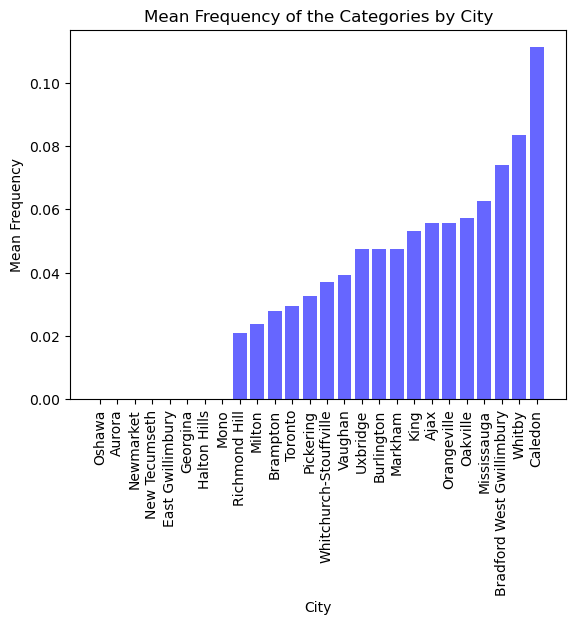

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = gta_coffee['City']
mean=gta_coffee['Mean_Freq']

plt.bar(objects, mean, align='center', alpha=0.6, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mean Frequency')
plt.xlabel('City')
plt.title('Mean Frequency of the Categories by City')

plt.show()

## 4. Results

Visualize the frequencies by plotting a bar chart

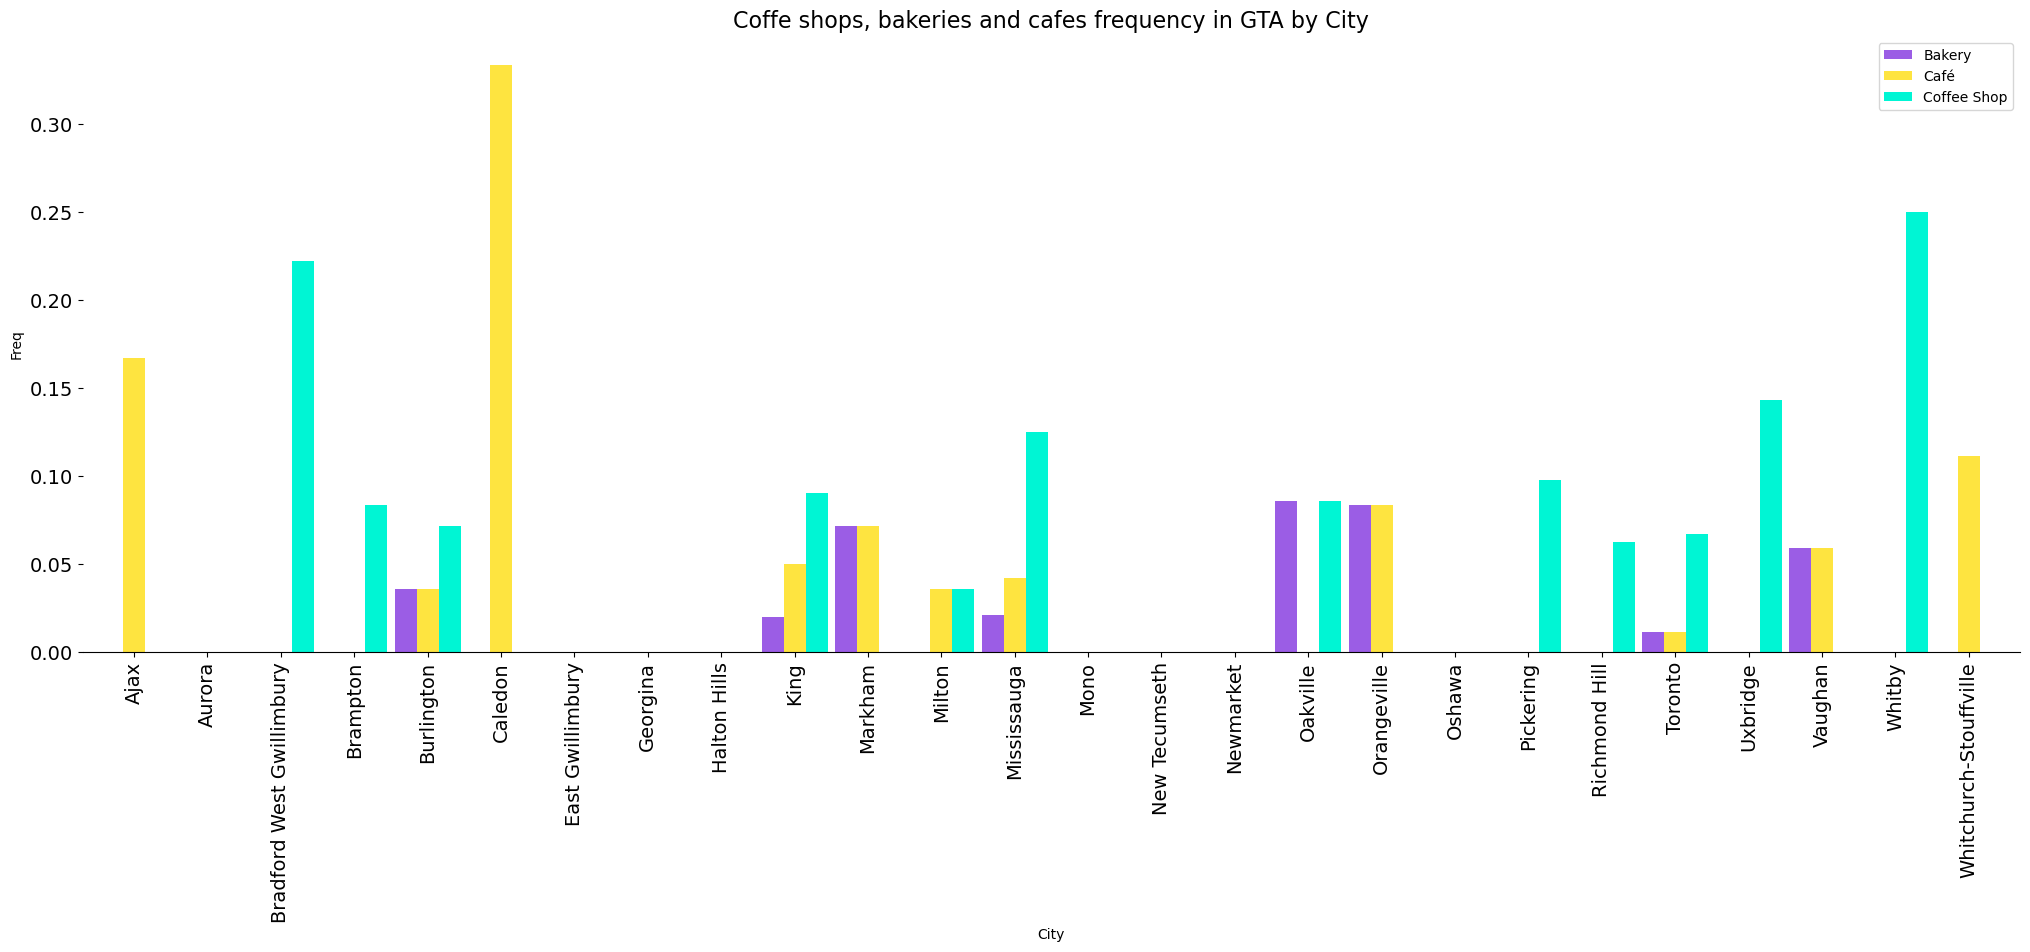

In [31]:
import pandas as pd
import matplotlib.pyplot as plt



labels = gta_coffe['City']
x = np.arange(len(labels))  # the label locations

#PLOTTING
ax1 = gta_coffe.plot(kind = 'bar',
                figsize = (25,8),
                width = 0.9,
                color = ('#9b5de5', '#fee440', '#00f5d4'),
                fontsize = 14)



ax1.set_title("Coffe shops, bakeries and cafes frequency in GTA by City", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.set_ylabel('Freq')
ax1.set_xlabel('City')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()





As we can see Aurora, Caledon, East Gwillmbury, Georgina, Halton Hills, Mono, New Tecumseth, Newmarket, Oshawa are cities without coverage for these businesses (bakery and coffee shop)

Now, lets plot the population within GTA

In [27]:
gta_ppl.drop(['Populationdensity 2011a[3]','Populationdensity 2016a[4]'],axis=1,inplace=True)

In [32]:
gta_ppl.rename(columns={"Census subdivision":"City","Population2006[2]":"2006","Population2011[3]":"2011","Population2016[4]":
                       "2016"}, inplace=True)

gta_ppl.set_index('City')
gta_ppl = gta_ppl.sort_values('2016')
gta_ppl

,City,2006,2011,2016
3,Brock,11979,11341,11642
21,Uxbridge,19169,20623,21176
19,Scugog,21439,21569,21617
7,East Gwillimbury,21069,22473,23991
10,King,19487,19899,24512
8,Georgina,42346,43517,45418
24,Whitchurch-Stouffville,24390,37628,45837
1,Aurora,47629,53203,55445
9,Halton Hills,55289,59013,61161
5,Caledon,57050,59460,66502


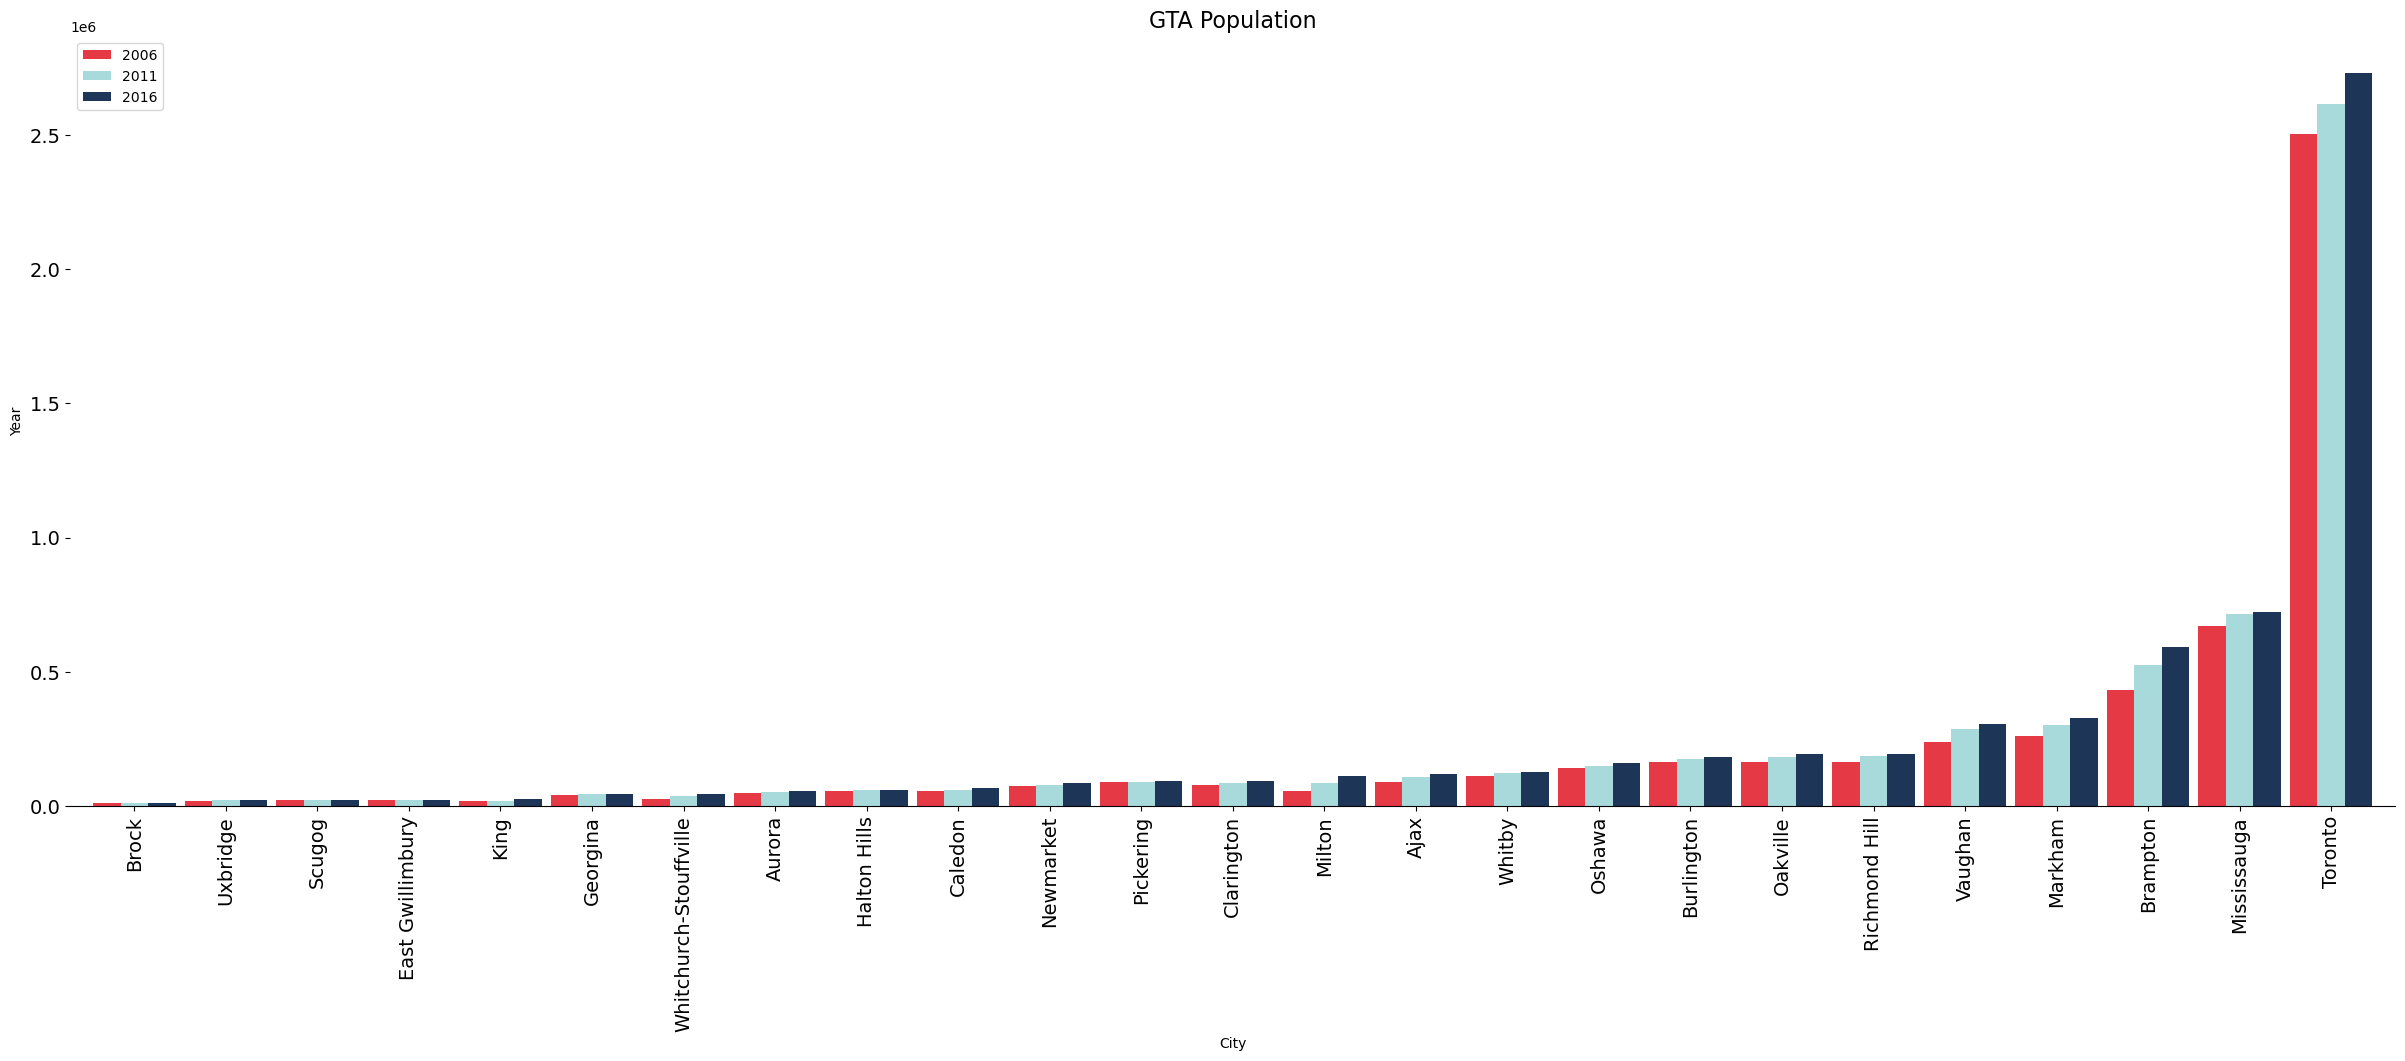

In [33]:

labels = gta_ppl['City']
x = np.arange(len(labels))  # the label locations

#PLOTTING
ax = gta_ppl.plot(kind = 'bar',
                figsize = (30,10),
                width = 0.9,
                color = ('#e63946', '#a8dadc', '#1d3557'),
                fontsize = 14)



ax.set_title("GTA Population", 
             fontsize = 16)
ax.legend(fontsize = 14)
ax.set_ylabel('Year')
ax.set_xlabel('City')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


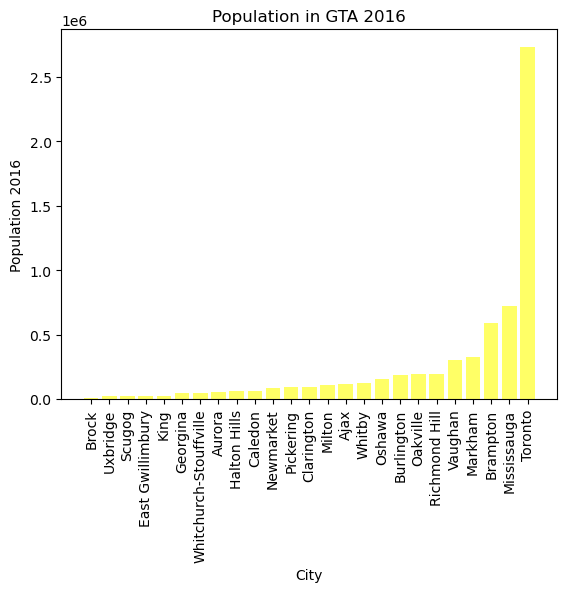

In [34]:
cities = gta_ppl['City']
ppl=gta_ppl['2016']

plt.bar(cities, ppl, align='center', alpha=0.6, color='yellow')
plt.xticks(rotation='vertical')
plt.ylabel('Population 2016')
plt.xlabel('City')
plt.title('Population in GTA 2016')

plt.show()

In [35]:
gta_ppl1=gta_ppl

gta_ppl1.drop(index=22,inplace=True)

gta_ppl1.drop(index=11,inplace=True)

gta_ppl1.drop(index=2,inplace=True)

gta_ppl1.drop(index=13,inplace=True)

gta_ppl1

,City,2006,2011,2016
3,Brock,11979,11341,11642
21,Uxbridge,19169,20623,21176
19,Scugog,21439,21569,21617
7,East Gwillimbury,21069,22473,23991
10,King,19487,19899,24512
8,Georgina,42346,43517,45418
24,Whitchurch-Stouffville,24390,37628,45837
1,Aurora,47629,53203,55445
9,Halton Hills,55289,59013,61161
5,Caledon,57050,59460,66502


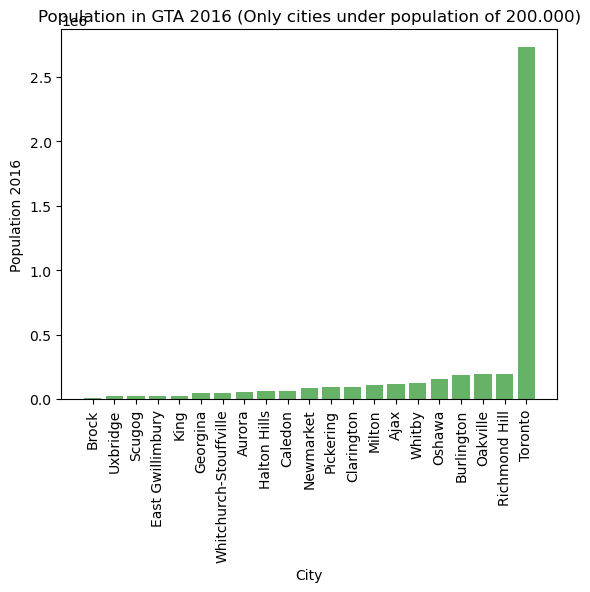

In [36]:
cities = gta_ppl1['City']
ppl=gta_ppl1['2016']

plt.bar(cities, ppl, align='center', alpha=0.6, color='green')
plt.xticks(rotation='vertical')
plt.ylabel('Population 2016')
plt.xlabel('City')
plt.title('Population in GTA 2016 (Only cities under population of 200.000)')

plt.show()

As we can see, the cities we metioned before have small populations, however it could be interesting  check individually its demography so a decision could be made. 


In [37]:
gta

,Region,City,Latitude,Longitude,Population
0,Toronto,Toronto,43.6535,-79.3839,119677.0
1,Durham Region,Ajax,43.8504,-79.0247,55445.0
2,Durham Region,Clarington,43.9687,-78.6514,593638.0
3,Durham Region,Brock,44.3477,-79.1002,11642.0
4,Durham Region,Oshawa,43.9177,-78.863,183314.0
5,Durham Region,Pickering,43.8358,-79.0906,66502.0
6,Durham Region,Scugog,44.1151,-78.906,92013.0
7,Durham Region,Uxbridge,44.1089,-79.1227,23991.0
8,Durham Region,Whitby,43.8999,-78.9402,45418.0
9,Halton Region,Burlington,43.3249,-79.7967,61161.0


In [44]:
data={'City':gta_coffee['City'], 'Mean_Frequency':gta_coffee['Mean_Freq'], 'Population':gta['Population']}

In [45]:
gta_fp=pd.DataFrame(data)
gta_fp

,City,Mean_Frequency,Population
0,Ajax,0.055556,119677.0
1,Aurora,0.000000,55445.0
2,Bradford West Gwillimbury,0.074074,593638.0
3,Brampton,0.027778,11642.0
4,Burlington,0.047619,183314.0
5,Caledon,0.111111,66502.0
6,East Gwillimbury,0.000000,92013.0
7,Georgina,0.000000,23991.0
8,Halton Hills,0.000000,45418.0
9,King,0.053333,61161.0


In [48]:
gta_fp.dropna(inplace=True)

In [49]:
gta_fp.describe()

,Mean_Frequency,Population
count,26.000000,2.600000e+01
mean,0.034857,2.471436e+05
std,0.030196,5.354535e+05
min,0.000000,8.609000e+03
25%,0.000000,4.552275e+04
50%,0.034779,9.189200e+04
75%,0.055000,1.912025e+05
max,0.111111,2.731571e+06


In [50]:
%%capture
! pip install seaborn

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 0.21447674190097119)

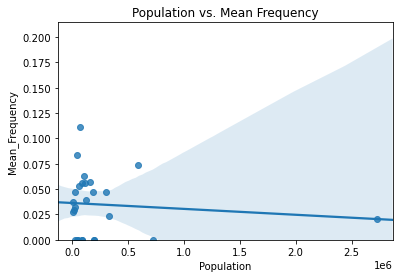

In [57]:
sns.regplot(x="Population", y="Mean_Frequency", data=gta_fp)
plt.title('Population vs. Mean Frequency')
plt.ylim(0,)

Let's sort our categories

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
gta_venues_sorted = pd.DataFrame(columns=columns)
gta_venues_sorted['City'] = gta_grouped['City']

for ind in np.arange(gta_grouped.shape[0]):
    gta_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gta_grouped.iloc[ind, :], num_top_venues)

gta_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajax,Grocery Store,Beer Store,Breakfast Spot,Middle Eastern Restaurant,Mexican Restaurant,Café,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,Aurora,Bank,Spa,Restaurant,Bus Station,Burger Joint,Pharmacy,Home Service,Electronics Store,Fountain,Food Truck
2,Bradford West Gwillimbury,Coffee Shop,Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Thai Restaurant,Pharmacy,Italian Restaurant,Diner,Discount Store
3,Brampton,Italian Restaurant,Coffee Shop,Bank,Pizza Place,Bus Station,Farmers Market,Martial Arts School,South Indian Restaurant,Liquor Store,Pub
4,Burlington,Coffee Shop,Pub,Bakery,Restaurant,Café,Vegetarian / Vegan Restaurant,Italian Restaurant,Pizza Place,Mediterranean Restaurant,Mexican Restaurant
5,Caledon,Soccer Field,Café,Skating Rink,Yoga Studio,Fast Food Restaurant,Fountain,Food Truck,Food Court,Field,Farmers Market
6,East Gwillimbury,Train Station,Burger Joint,Yoga Studio,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food Court
7,Georgina,Pizza Place,Harbor / Marina,Music Store,Gas Station,Sushi Restaurant,Grocery Store,Restaurant,Diner,Dim Sum Restaurant,Discount Store
8,Halton Hills,Home Service,Yoga Studio,Farmers Market,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food Court,Field,Fast Food Restaurant
9,King,Coffee Shop,Hotel,Restaurant,Café,Gastropub,Seafood Restaurant,Japanese Restaurant,Gym,American Restaurant,Italian Restaurant


Then, just for comparing, let's see how similar these cities are by clustering with k-means

In [60]:
# set number of clusters
kclusters = 5

gta_grouped_clustering = gta_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gta_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([1, 0, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [61]:
# add clustering labels
gta_venues_sorted.insert(0, 'Clusters Label', kmeans.labels_)

gta_merged = gta

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
gta_merged = gta_merged.join(gta_venues_sorted.set_index('City'), on='City')

gta_merged.head() # check the last columns!

,Region,City,Latitude,Longitude,Population,Clusters Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto,Toronto,43.6535,-79.3839,119677.0,1.0,Clothing Store,Coffee Shop,Hotel,Diner,Plaza,New American Restaurant,Restaurant,Breakfast Spot,Cosmetics Shop,Bar
1,Durham Region,Ajax,43.8504,-79.0247,55445.0,1.0,Grocery Store,Beer Store,Breakfast Spot,Middle Eastern Restaurant,Mexican Restaurant,Café,Electronics Store,Farmers Market,Fast Food Restaurant,Field
2,Durham Region,Clarington,43.9687,-78.6514,593638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Durham Region,Brock,44.3477,-79.1002,11642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Durham Region,Oshawa,43.9177,-78.863,183314.0,1.0,Snack Place,Roof Deck,Locksmith,Yoga Studio,Farmers Market,French Restaurant,Fountain,Food Truck,Food Court,Field


In [62]:
gta_merged.dropna(inplace=True)

In [63]:
gta_merged['Clusters Label'] = gta_merged['Clusters Label'].astype(int)
gta_merged['Population'] = gta_merged['Population'].astype(int)

In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gta_merged['Latitude'], gta_merged['Longitude'], gta_merged['City'], gta_merged['Clusters Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Discussion

As we could see in the results session, there were some cities that do not count with a coffee shop or bakery. This means that their people need to go to a neighbour town to enjoy of a good coffee or a piece of cake. So, these cities could be interesting for some investors as there are not competitors there. Even though, it is important to observe the population in those cities as the most population concentrates in Toronto, Mississagua and Brampton. The rest of the cities are not that big in population which could be also a risk when investing in this kind of business.

## 6. Conclusion

In order to complete  this project, many taks had to be done. For example, looking for the data, wrangling it, plotting it, and so on. All these tasks are not as simple as they sound, though. It was a whole process to gain the knowledge and the expertise to know at least how to tackle a real life problem and solve it by using data. All this thanks the IBM and Coursera's Data Science Professional Certificate.

Sometimes it was a little bit hard to solve all the issues that came up in each step, but with the proper information all of them were succesfuly solved. And that it is thanks to this Professional Certificate.